In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Exploring the Bias Variance Tradeoff


## Step 1: Write a function `generate_data(N)` 

Write a function `generate_data(N)` that produces `N` samples from the following model

$$
p(s) = p(x,y) = p(y|x)p(x)
$$

with the following true" underlying polynomial noisy model

$$p(x) = \mathrm{Uniform}(-1,1)$$
$$p(y|x) = \mathrm{Normal}(\mu = f(x),\sigma = 0.2)$$
$$f(x) = \sum_i p_i x^i$$,

with $p_0 = -0.7, p_1 = 2.2, p_2 = 0.5, p_3 = 1.0$


Hint: you can use `np.polyval` to evaluate a polynomial with a fixed set of coefficients (but watch out for the order)

The function should return a array of `x` values and an array of `y` values

In [2]:
coeffs_true = [1.0,0.5,2.2,-0.7]
def generate_data(N):
    x = np.random.uniform(-1,1, size = N)
    y = np.polyval(coeffs_true,x)
    y = y + np.random.normal(0,0.2, size = N)
    return x,y

## Step 2: Plot Samples and Functions

Write a function `plot(ax,train_x,train_y,p_trained,p_true)` that
takes a matplotlib axis object and plots

* plot the true function 
* plot a second (trained or random) function 
* plot the samples 

In the end you should be able to call it like this:

```
f = plt.figure()
x,y = generate_data(10)
plot(f.gca(),x,y,np.random.normal(size = (4,)), p_true)
```

In [3]:
def plot(ax,train_x,train_y,p_trained,p_true):
    xi = np.linspace(-1,1,1001)
    yi = np.polyval(coeffs_true,xi)
    ax.plot(xi,yi,label = 'true')
    yi = np.polyval(p_trained,xi)
    ax.plot(xi,yi,label = 'trained')
    ax.scatter(train_x,train_y, alpha = 0.2, c = 'k')
    ax.set_ylim(-4,4)
    ax.legend()

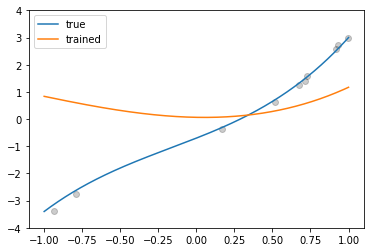

In [4]:
f = plt.figure()
x,y = generate_data(10)
plot(f.gca(),x,y,np.random.normal(size = (4,)), coeffs_true)

## Step 3

One can show that given a Hypothesis Set of Polynomial functions

$$f(x) = \sum_i w_i x^i$$

and a risk function of the following form

$$l(s) = l(x,y) = (y - f(x))^2$$

there is a closed form solution for finding the empirical risk minimization, where the best fit coefficients $\vec{w}$ is given by

$$
w = (X^T X)^{-1} X^T y
$$

where $X$ is the matrix with rows $(x^0,x^1,x^2,x^3,\dots,x^d)$ and one row for each sample

$$
X = \left(
\begin{array}{}
x_1^0,\dots,x_1^d  \\
x_2^0,\dots,x_2^d  \\
\dots \\
x_n^0,\dots,x_n^d  \\
\end{array}
\right)
$$

* Write a function `learn(train_x, train_y, degree)` to return the $(d+1)$ optimal coefficients for a polynomial fit of degree $d$.
* Fit a sampled of 5 data points with degree 4
* Plot the Trained function together with the true function using the plotting method from the last step
* Try this multiple time to get a feel for how much the data affects the fit
* Try degree 1 and observe how the trained function is much less sensitive to the data

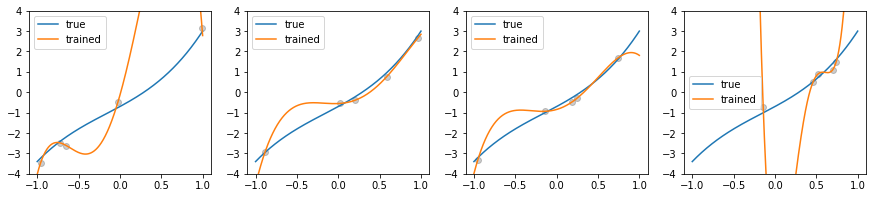

In [5]:
def learn(train_x, train_y, degree):
    X = np.column_stack([train_x**d for d in reversed(range(degree+1))])
    return np.linalg.inv(X.T @ X) @ X.T @ train_y

f,axarr = plt.subplots(1,4)
# run multiple tries, see data dependence
for ax in axarr.ravel():
    x,y = generate_data(5)
    coeffs = learn(x,y,degree = 4)
    plot(ax,x,y,coeffs, coeffs_true)
f.set_size_inches(15,3)

## Step 4

Write a function to evaluate the risk or loss of a sample. Use our loss function for which we have the training procedure above

$$
l(s) = l(x,y) = (y - f(x))^2
$$

and right a function `risk(x,y_true, trained_coeffs)` to cmpute

$$
\hat{L} = \frac{1}{N}\sum_i l(s_i) = \frac{1}{N}\sum_i l(x,y) = \frac{1}{N}\sum_i (y - f(x))^2
$$

* Draw a size 100 data sample and fit the result to obtain trained coefficients
* Draw 10000 samples of size 10 and compute their empirical risk under the trained coefficients
* Repeat the same but use the true coefficients of the underlying data-generating process
* Histogram the two sets of 10,000 risk evaluations. Which one has lower average risk?

In [6]:
def risk(x,y_true,p):
    predicted = np.polyval(p,x)
    return ((y_true-predicted)**2).mean()

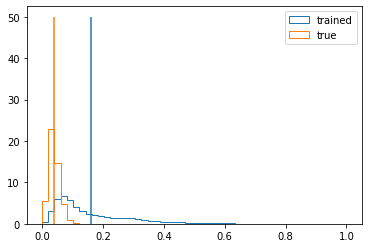

In [8]:
coeffs_trained = learn(*generate_data(10), degree = 4)

risk_trained = np.array([risk(*generate_data(10), p = coeffs_trained) for i in range(10000)])
risk_true = np.array([risk(*generate_data(10), p = coeffs_true) for i in range(10000)])

bins = np.linspace(0,1)
plt.hist(risk_trained, bins = bins, histtype = 'step', label = 'trained', density = True);
plt.hist(risk_true, bins = bins, histtype = 'step', label = 'true', density = True);
plt.legend()
plt.vlines(risk_trained.mean(),0,50,colors = 'C0')
plt.vlines(risk_true.mean(),0,50,colors = 'C1')

## Step 5

Explore how the fit improves when adding more data. Plot the best fit model for data set sizes of 

$$N = 5,10,100,200,1000$$

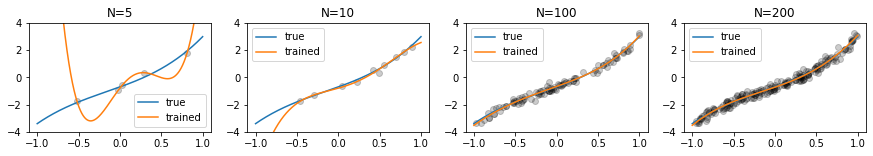

In [9]:
f,axarr = plt.subplots(1,4)

for ax,N in zip(axarr.ravel(),[5,10,100,200,1000]):
    train_x,train_y = generate_data(N)
    coeffs_trained = learn(train_x,train_y,4)
    plot(ax,train_x,train_y,coeffs_trained,coeffs_true)
    ax.set_title(f'N={N}')
f.set_size_inches(15,2)

## Step 6

Explore how the fit changes when using more and more complex models. Plot the best fit model for degrees

$$d = 1,2,5,10$$

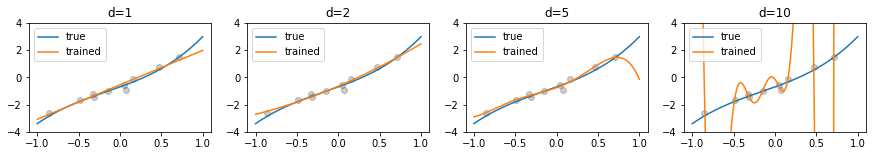

In [13]:
f,axarr = plt.subplots(1,4)
train_x,train_y = generate_data(10)

for ax,degree in zip(axarr.ravel(),[1,2,5,10]):
    coeffs_trained = learn(train_x,train_y,degree)
    plot(ax,train_x,train_y,coeffs_trained,coeffs_true)
    ax.set_title(f'd={degree}')
f.set_size_inches(15,2)

## Step 7 Bias-Variance Tradeoff

Draw two datasets:

* A train dataset with $N=10$
* A test dataset with $N=1000$

Perform trainings on the train dataset for degrees $1\dots8$ and store the training coefficients

* Evaluate the risk under the various trainings for the train and the test dataset
* Plot the train and test risk as a function of the polynomial degree

Text(0, 0.5, 'risk')

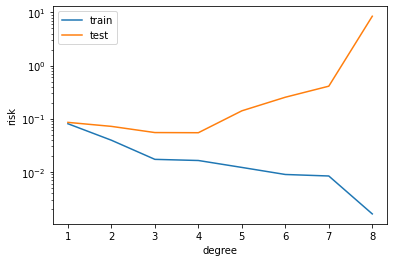

In [12]:
train_x,train_y = generate_data(10)
test_x,test_y = generate_data(1000)


degrees = range(1,9)
trainings = [learn(train_x,train_y,d) for d in degrees]

a = [risk(train_x,train_y,t) for t in trainings]
b = [risk(test_x,test_y,t) for t in trainings]
plt.plot(degrees,a, label = 'train')
plt.plot(degrees,b, label = 'test')
plt.legend()
plt.semilogy()
plt.xlabel('degree')
plt.ylabel('risk')